In [13]:
from feature_extraction import get_all_features, extract_log_fft_features
from classification import reduce_dimensionality_UMAP, fit_classifier, evaluate_classifier, print_scores, calculate_silhouette_score, calculate_davies_bouldin_score
from visualisation import plot2D, show_confusion_matrix
from sklearn.model_selection import train_test_split
from vae_reduction import reduce_dimensionality_VAE
from sklearn.svm import SVC

/home/rynowak/Dokumenty/Programy/medyczna/Vibroacoustic-analysis/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-06-18 08:56:35.756580: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-18 08:56:35.771490: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-18 08:56:35.892857: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-18 08:56:36.023024: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to regist

No filtering, No dim reduction, fft feature extraction, svm

              precision    recall  f1-score   support

     chicken       0.40      0.01      0.03      1403
    gelatine       0.44      0.64      0.52      1288
    zucchini       0.43      0.65      0.52      1550

    accuracy                           0.43      4241
   macro avg       0.42      0.43      0.35      4241
weighted avg       0.42      0.43      0.36      4241



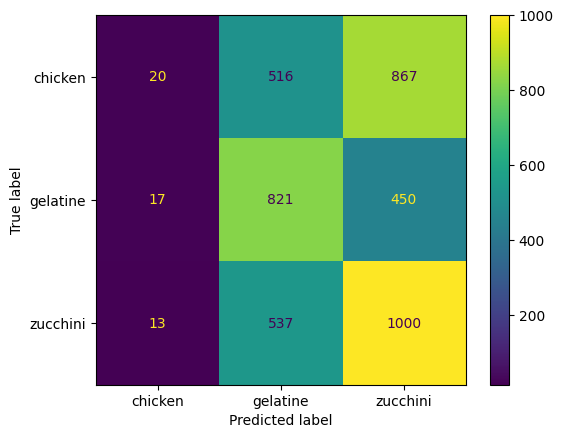

In [3]:
features, labels = get_all_features("results", extract_log_fft_features)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
clf = SVC()
clf.fit(X_train, y_train)
y_pred = evaluate_classifier(clf, X_test, y_test)
show_confusion_matrix(y_pred, y_test, display_labels=clf.classes_)

No filtering, No dim reduction, svm, mfcc feature extraction

              precision    recall  f1-score   support

     chicken       0.73      0.66      0.69      1403
    gelatine       0.83      0.93      0.88      1288
    zucchini       0.71      0.70      0.70      1550

    accuracy                           0.76      4241
   macro avg       0.76      0.76      0.76      4241
weighted avg       0.75      0.76      0.75      4241



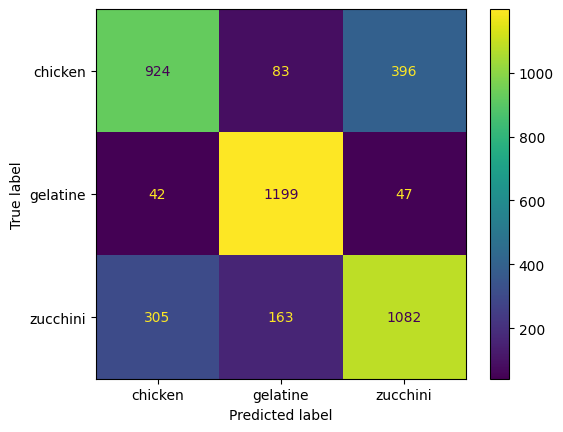

Silhouette Score: 0.0555
Davies-Bouldin Score: 3.0414


In [ ]:
features, labels = get_all_features("results")
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
clf = SVC()
clf.fit(X_train, y_train)
y_pred = evaluate_classifier(clf, X_test, y_test)
show_confusion_matrix(y_pred, y_test, display_labels=clf.classes_)

In [ ]:
import numpy as np

features1, _ = get_all_features("results_z_top")
features2, _ = get_all_features("results_z_bottom")
features = np.concatenate([features1, features2])
labels = ["zucchini top"] * len(features1) + ["zucchini bottom"] * len(features2)

/home/rynowak/Dokumenty/Programy/medyczna/Vibroacoustic-analysis/env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


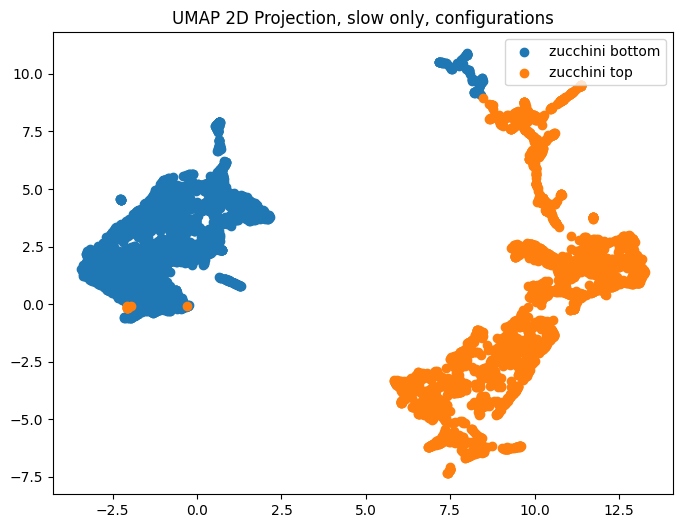

In [26]:
X_2d = reduce_dimensionality_UMAP(features, 2)
plot2D(X_2d, np.array(labels), title="UMAP 2D Projection, slow only, configurations")

No filtering UMAP 2D, k=3

/home/rynowak/Dokumenty/Programy/medyczna/Vibroacoustic-analysis/env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


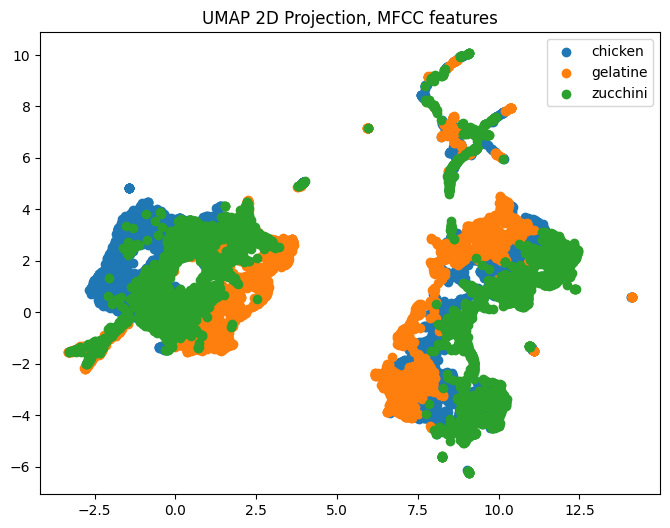

              precision    recall  f1-score   support

     chicken       0.87      0.84      0.85      1403
    gelatine       0.88      0.89      0.88      1288
    zucchini       0.85      0.87      0.86      1550

    accuracy                           0.87      4241
   macro avg       0.87      0.87      0.87      4241
weighted avg       0.87      0.87      0.87      4241



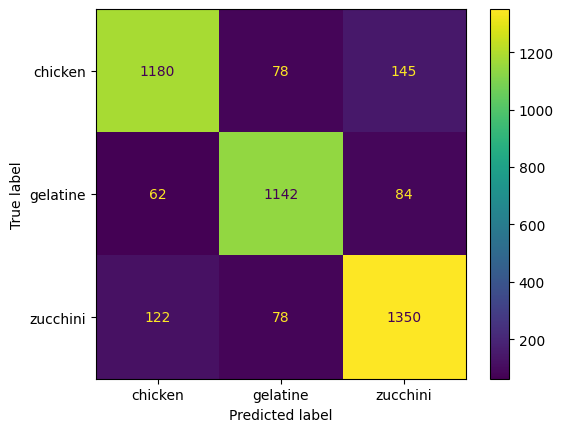

Silhouette Score: 0.0063
Davies-Bouldin Score: 9.8835


In [4]:
features, labels = get_all_features("results")
X_2d = reduce_dimensionality_UMAP(features, 2)
plot2D(X_2d, labels, title="UMAP 2D Projection, MFCC features")
X_train, X_test, y_train, y_test = train_test_split(X_2d, labels, test_size=0.3, random_state=42)
clf = fit_classifier(X_train, y_train, )
y_pred = evaluate_classifier(clf, X_test, y_test)
show_confusion_matrix(y_pred, y_test, display_labels=clf.classes_)
print_scores(X_test, y_pred)


No filtering UMAP 2D, k=3, fft

/home/rynowak/Dokumenty/Programy/medyczna/Vibroacoustic-analysis/env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


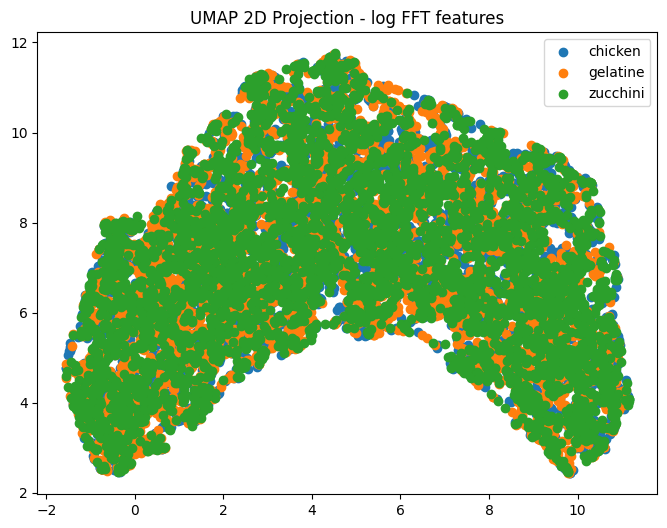

              precision    recall  f1-score   support

     chicken       0.34      0.47      0.39      1403
    gelatine       0.36      0.30      0.33      1288
    zucchini       0.38      0.31      0.34      1550

    accuracy                           0.36      4241
   macro avg       0.36      0.36      0.35      4241
weighted avg       0.36      0.36      0.35      4241



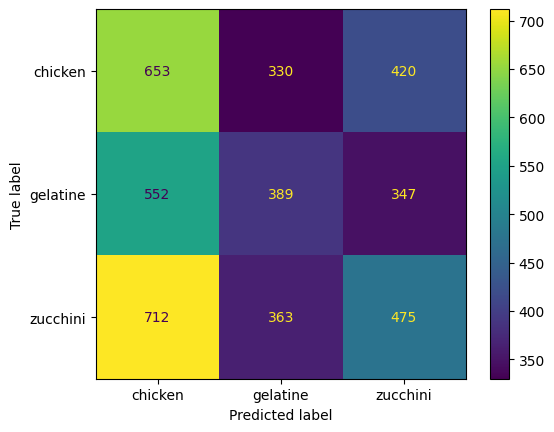

Silhouette Score: -0.0108
Davies-Bouldin Score: 49.2231


In [3]:
features, labels = get_all_features("results", extract_log_fft_features)
X_2d = reduce_dimensionality_UMAP(features, 2)
plot2D(X_2d, labels, title="UMAP 2D Projection - log FFT features")
X_train, X_test, y_train, y_test = train_test_split(X_2d, labels, test_size=0.3, random_state=42)
clf = fit_classifier(X_train, y_train, )
y_pred = evaluate_classifier(clf, X_test, y_test)
show_confusion_matrix(y_pred, y_test, display_labels=clf.classes_)
print_scores(X_test, y_pred)


No filtering, UMAP 5D, k=12, mfcc

/home/rynowak/Dokumenty/Programy/medyczna/Vibroacoustic-analysis/env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


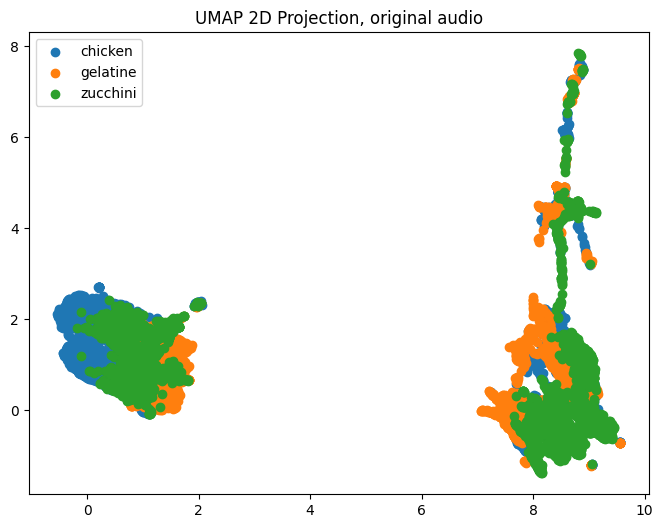

              precision    recall  f1-score   support

     chicken       0.86      0.88      0.87      1403
    gelatine       0.90      0.89      0.90      1288
    zucchini       0.88      0.86      0.87      1550

    accuracy                           0.88      4241
   macro avg       0.88      0.88      0.88      4241
weighted avg       0.88      0.88      0.88      4241



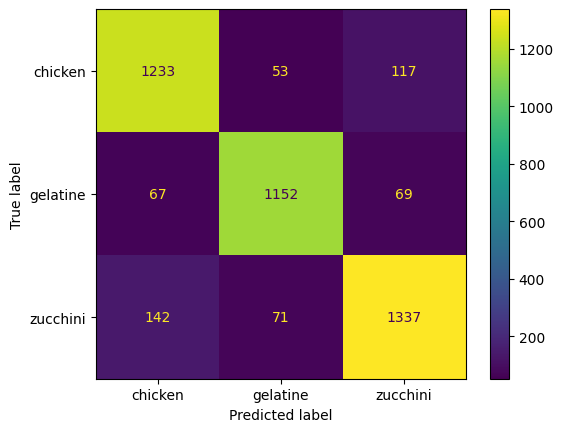

In [10]:
features, labels = get_all_features("results")
X_5d = reduce_dimensionality_UMAP(features, components=5)
plot2D(X_5d[:, :2], labels, title="UMAP 2D Projection, original audio")
X_train, X_test, y_train, y_test = train_test_split(X_5d, labels, test_size=0.3, random_state=42)
clf = fit_classifier(X_train, y_train, k=12)
y_pred = evaluate_classifier(clf, X_test, y_test)
show_confusion_matrix(y_pred, y_test, display_labels=clf.classes_)

umap, svm

/home/rynowak/Dokumenty/Programy/medyczna/Vibroacoustic-analysis/env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


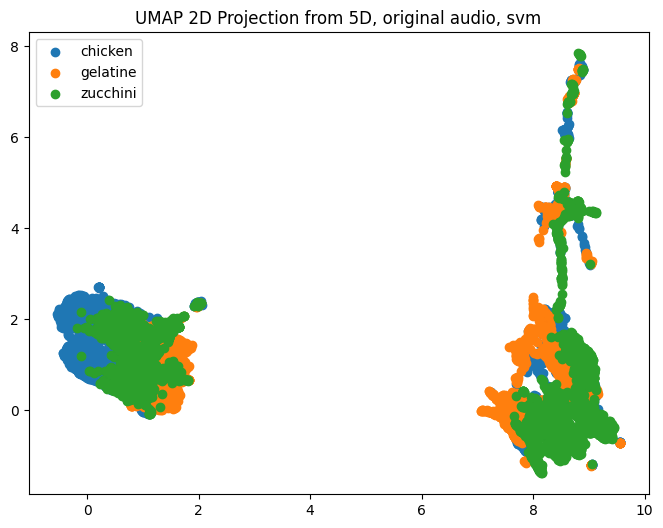

              precision    recall  f1-score   support

     chicken       0.81      0.80      0.81      1403
    gelatine       0.87      0.83      0.85      1288
    zucchini       0.79      0.83      0.81      1550

    accuracy                           0.82      4241
   macro avg       0.82      0.82      0.82      4241
weighted avg       0.82      0.82      0.82      4241



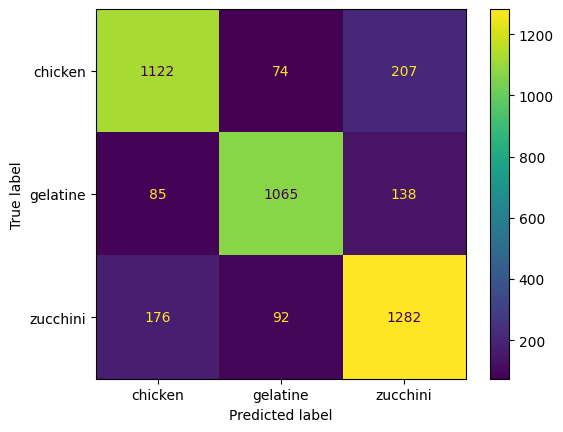

In [9]:
features, labels = get_all_features("results")
X_5d = reduce_dimensionality_UMAP(features, components=5)
plot2D(X_5d[:, :2], labels, title="UMAP 2D Projection from 5D, original audio, svm")
X_train, X_test, y_train, y_test = train_test_split(X_5d, labels, test_size=0.3, random_state=42)
clf = SVC()
clf.fit(X_train, y_train)
y_pred = evaluate_classifier(clf, X_test, y_test)
show_confusion_matrix(y_pred, y_test, display_labels=clf.classes_)

No filtering, VAE 2D, fft

2025-06-17 23:37:21.680727: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


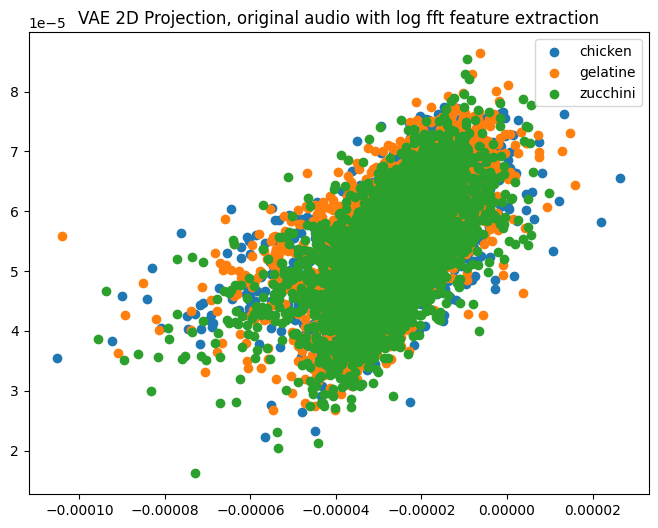

              precision    recall  f1-score   support

     chicken       0.34      0.47      0.40      1403
    gelatine       0.36      0.30      0.33      1288
    zucchini       0.39      0.31      0.35      1550

    accuracy                           0.36      4241
   macro avg       0.36      0.36      0.36      4241
weighted avg       0.37      0.36      0.36      4241



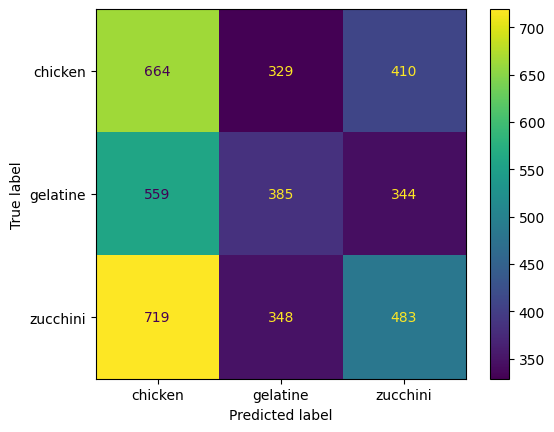

In [7]:
features, labels = get_all_features("results", extract_log_fft_features)
X_2d = reduce_dimensionality_VAE(features, 2)
plot2D(X_2d, labels, title="VAE 2D Projection, original audio with log fft feature extraction")
X_train, X_test, y_train, y_test = train_test_split(X_2d, labels, test_size=0.3, random_state=42)
clf = fit_classifier(X_train, y_train)
y_pred = evaluate_classifier(clf, X_test, y_test)
show_confusion_matrix(y_pred, y_test, display_labels=clf.classes_)

No filtering, VAE 2D, mfcc

442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


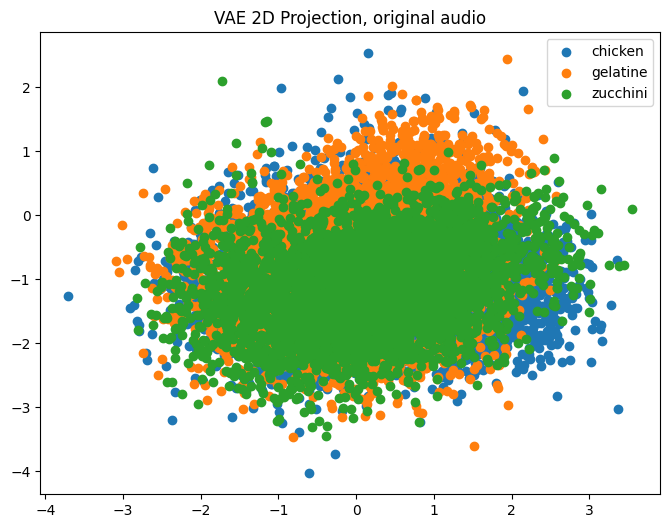

              precision    recall  f1-score   support

     chicken       0.39      0.49      0.44      1403
    gelatine       0.42      0.40      0.41      1288
    zucchini       0.45      0.37      0.41      1550

    accuracy                           0.42      4241
   macro avg       0.42      0.42      0.42      4241
weighted avg       0.42      0.42      0.42      4241



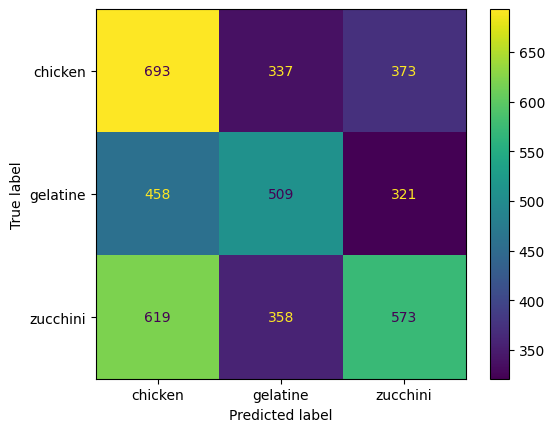

In [8]:
features, labels = get_all_features("results")
X_2d = reduce_dimensionality_VAE(features, 2)
plot2D(X_2d, labels, title="VAE 2D Projection, original audio")
X_train, X_test, y_train, y_test = train_test_split(X_2d, labels, test_size=0.3, random_state=42)
clf = fit_classifier(X_train, y_train)
y_pred = evaluate_classifier(clf, X_test, y_test)
show_confusion_matrix(y_pred, y_test, display_labels=clf.classes_)

Bandpass filter UMAP 2D

/home/rynowak/Dokumenty/Programy/medyczna/Vibroacoustic-analysis/env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/rynowak/Dokumenty/Programy/medyczna/Vibroacoustic-analysis/env/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/rynowak/Dokumenty/Programy/medyczna/Vibroacoustic-analysis/env/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/rynowak/Dokumenty/Programy/medyczna/Vibroacoustic-analysis/env/lib/python3.12/site-package

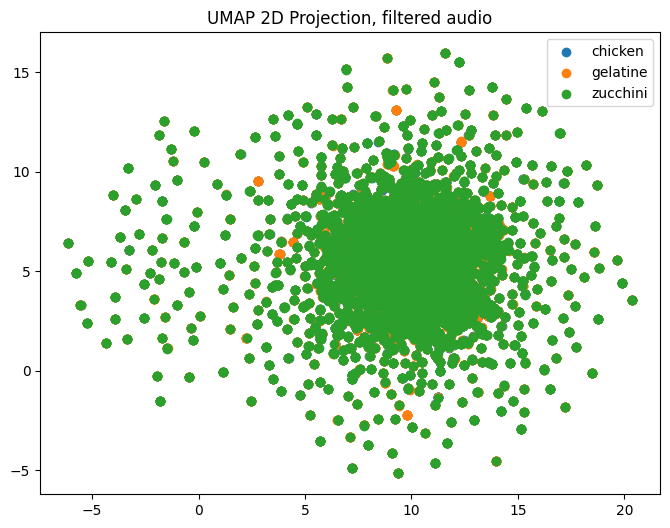

              precision    recall  f1-score   support

     chicken       0.35      0.44      0.39      1403
    gelatine       0.35      0.30      0.32      1290
    zucchini       0.37      0.33      0.35      1519

    accuracy                           0.36      4212
   macro avg       0.36      0.36      0.35      4212
weighted avg       0.36      0.36      0.36      4212



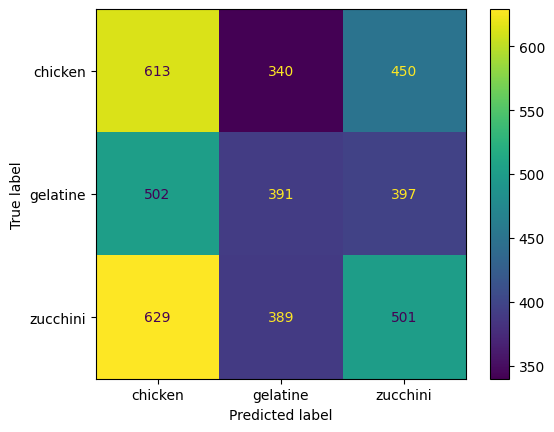

In [5]:
features, labels = get_all_features("results_filtered")
X_2d = reduce_dimensionality_UMAP(features, 2)
plot2D(X_2d, labels, title="UMAP 2D Projection, filtered audio")
X_train, X_test, y_train, y_test = train_test_split(X_2d, labels, test_size=0.3, random_state=42)
clf = fit_classifier(X_train, y_train)
y_pred = evaluate_classifier(clf, X_test, y_test)
show_confusion_matrix(y_pred, y_test, display_labels=clf.classes_)


noisereduce UMAP 2D

/home/rynowak/Dokumenty/Programy/medyczna/Vibroacoustic-analysis/env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


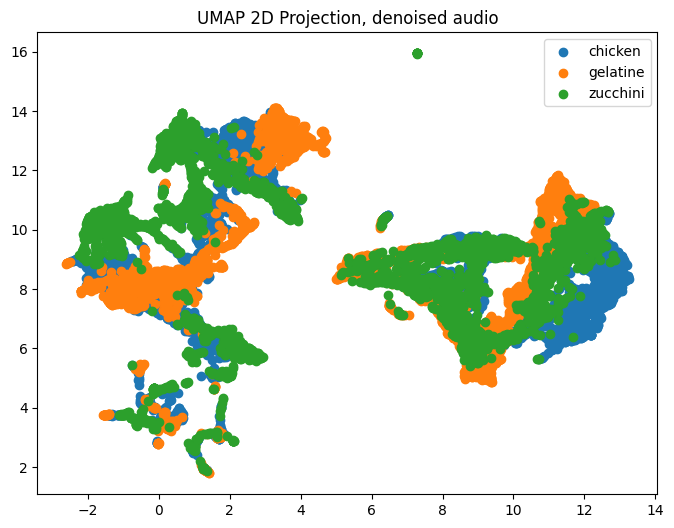

              precision    recall  f1-score   support

     chicken       0.83      0.81      0.82      1380
    gelatine       0.85      0.87      0.86      1311
    zucchini       0.81      0.82      0.82      1485

    accuracy                           0.83      4176
   macro avg       0.83      0.83      0.83      4176
weighted avg       0.83      0.83      0.83      4176



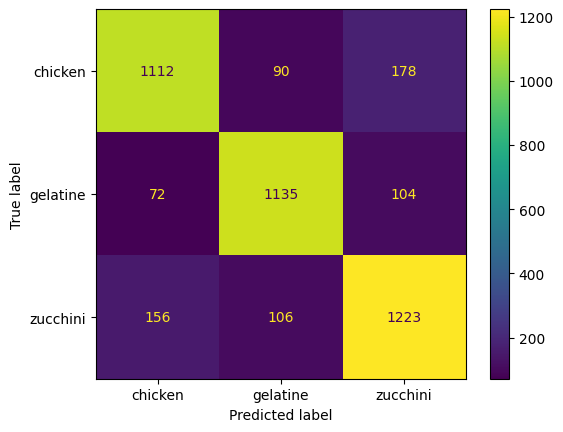

In [6]:
features, labels = get_all_features("results_denoised")
X_2d = reduce_dimensionality_UMAP(features, 2)
plot2D(X_2d, labels, title="UMAP 2D Projection, denoised audio")
X_train, X_test, y_train, y_test = train_test_split(X_2d, labels, test_size=0.3, random_state=42)
clf = fit_classifier(X_train, y_train)
y_pred = evaluate_classifier(clf, X_test, y_test)
show_confusion_matrix(y_pred, y_test, display_labels=clf.classes_)
